# Imports and Data Prep

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
!unzip S10.zip

Archive:  S10.zip
   creating: S10/
  inflating: __MACOSX/._S10          
  inflating: S10/.DS_Store           
  inflating: __MACOSX/S10/._.DS_Store  
  inflating: S10/S10_E4_Data.zip     
  inflating: __MACOSX/S10/._S10_E4_Data.zip  
  inflating: S10/S10.pkl             
  inflating: __MACOSX/S10/._S10.pkl  


In [5]:
from PyEMD import EMD
import sys
sys.executable

'/usr/bin/python3'

In [4]:
!pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [6]:
# Load Subject S10's data, testing on a small subset
data_dir = 'S10/'

with open(data_dir + 'S10.pkl', 'rb') as file:
    data = pickle.load(file, encoding='latin1')


# Extract EMG and ECG data, and convert to 1D
emg_data = data['signal']['chest']['EMG'].reshape(-1)
ecg_data = data['signal']['chest']['ECG'].reshape(-1)

print("\nEMG Data: \n", emg_data)
print("\nECG Data: \n", ecg_data)


EMG Data: 
 [-0.01368713 -0.02192688 -0.00901794 ...  0.00654602 -0.00141907
 -0.00814819]

ECG Data: 
 [-1.33369446 -1.32774353 -1.32206726 ...  0.53050232  0.53375244
  0.54057312]


In [7]:
emg_data.shape

# Adjust data subset size here
start = 1000
end = 11000

emg_data = emg_data[start:end]
ecg_data = ecg_data[start:end]

In [9]:
sample_rate = 700  # Hz

# ECG data
ecg_length = len(ecg_data)
time_ecg = np.arange(ecg_length) / sample_rate

# EMG data
emg_length = len(emg_data)
time_emg = np.arange(emg_length) / sample_rate


# EMD - Plotting IMFs

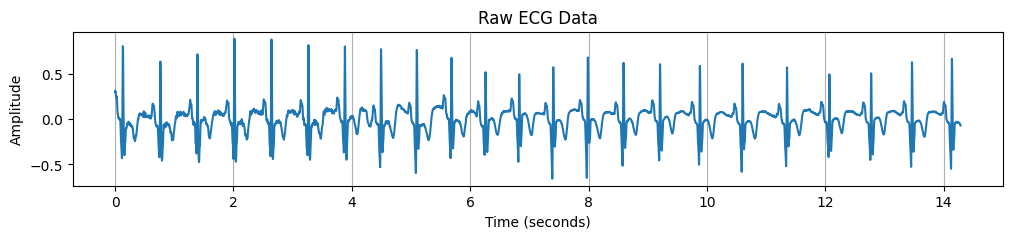

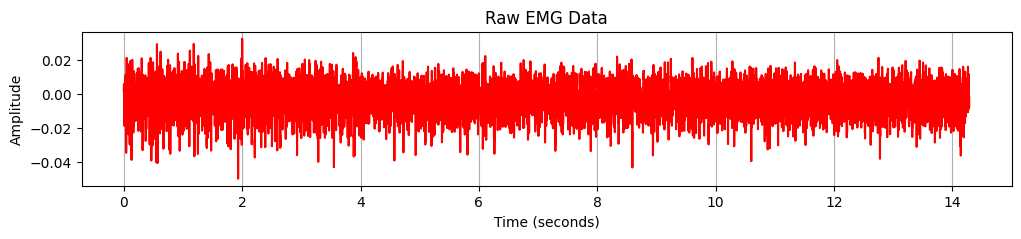

In [10]:
# Plot raw ECG signal with time on x-axis
plt.figure(figsize=(12, 2))
plt.plot(time_ecg, ecg_data)
plt.title('Raw ECG Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot raw EMG signal with time on x-axis
plt.figure(figsize=(12, 2))
plt.plot(time_emg, emg_data, color='r')
plt.title('Raw EMG Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()


In [13]:
# Prepare EMD
emd = EMD()

imfs_emg = emd(emg_data, max_imf=7)
imfs_ecg = emd(ecg_data, max_imf=7)


# RespiBAN is placed around the subject’s chest (see Figure 1). It collects the following measures: Electrocardiogram (ECG), electrodermal activity (EDA), Electromyography (EMG), Respiration (RESP), Skin Temperature (TEMP), and linear Acceleration (ACC). All signals are sampled at 700 Hz.
# The Empatica E4 wristband was worn on the nondominant hand. Measures recorded using the E4 were blood volume pulse (BVP), EDA, TEMP and ACC, which were sampled at 64 Hz, 4 Hz, 4 Hz, and 32 Hz, respectively.

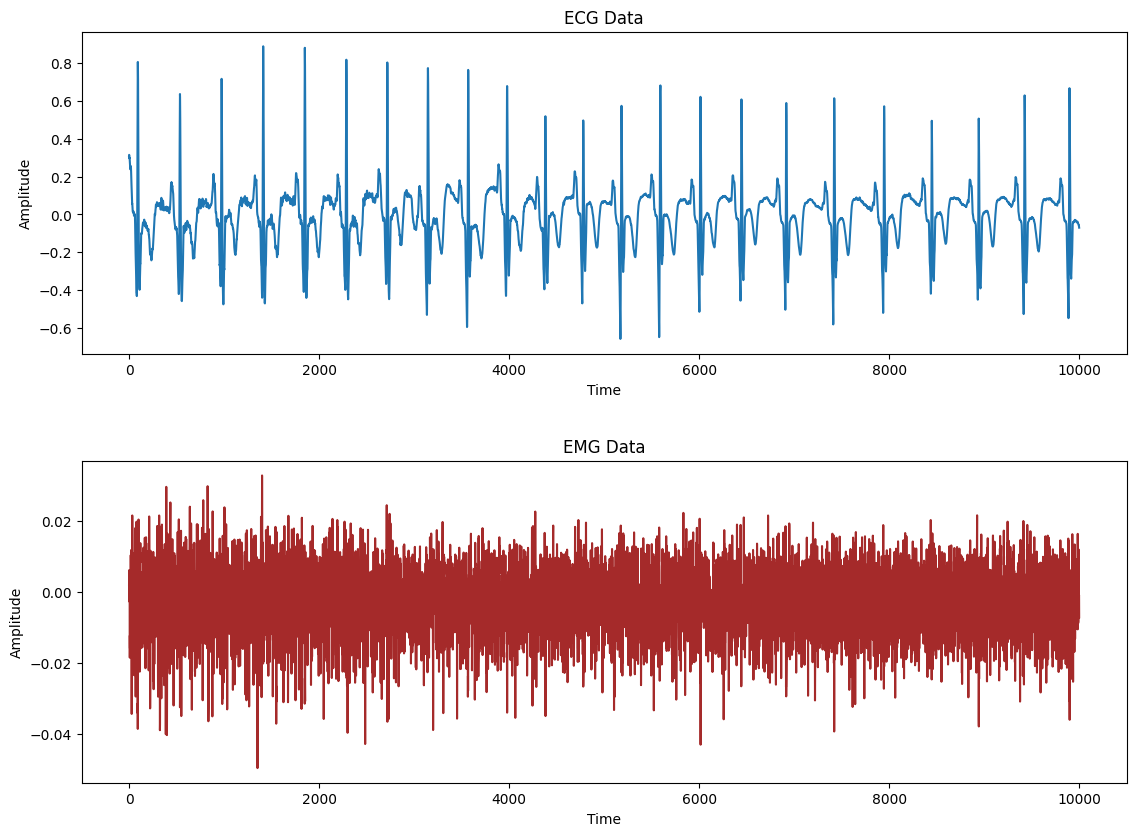

In [14]:
fig, axs = plt.subplots(2, figsize=(12, 9))

# Plot ECG data
axs[0].plot(ecg_data)
axs[0].set_title('ECG Data')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Plot EMG data
axs[1].plot(emg_data, color='brown')
axs[1].set_title('EMG Data')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout(pad=3.0)
plt.show()

In [15]:
# New figure for ECG data
fig = plt.figure(figsize=(12, 9))

# Get number of IMFs
n_imfs_ecg = imfs_ecg.shape[0]
n_imfs_emg = imfs_emg.shape[0]
print("# of ECG IMFs =", n_imfs_ecg, "\n# of EMG IMFs = ", n_imfs_emg)


# of ECG IMFs = 8 
# of EMG IMFs =  8


<Figure size 1200x900 with 0 Axes>

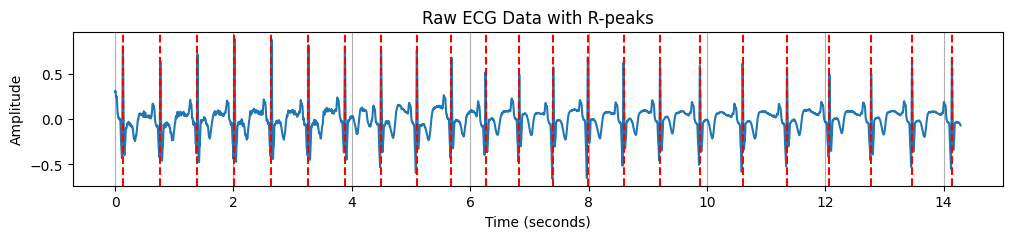

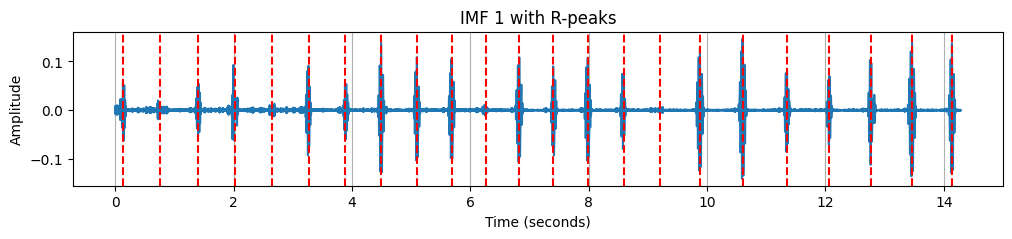

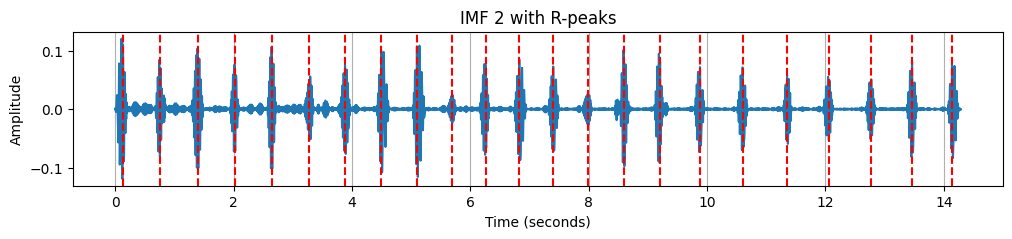

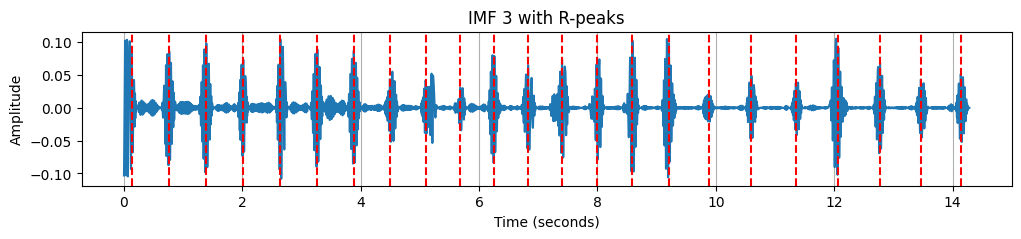

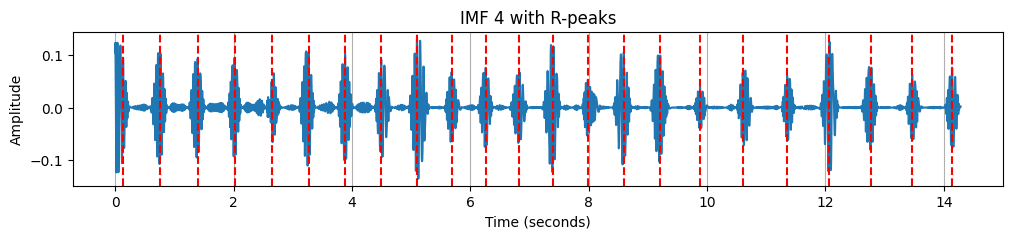

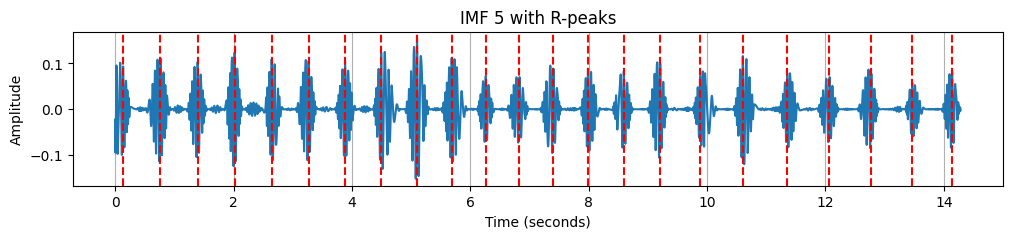

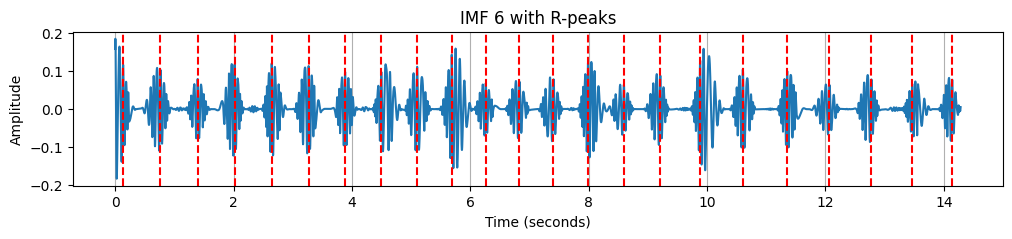

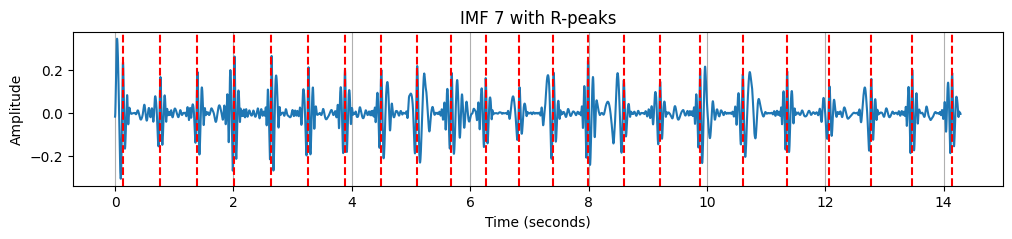

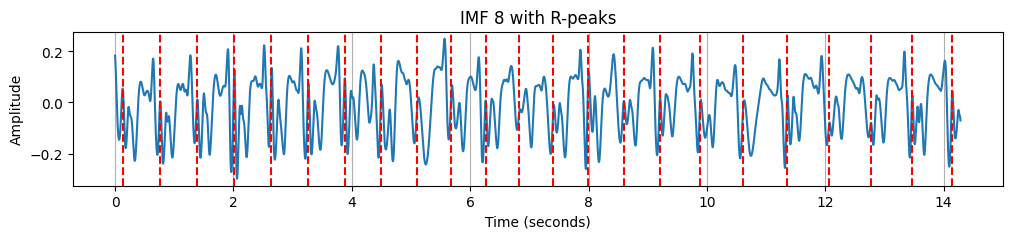

In [16]:
from scipy.signal import find_peaks

# Detect R-peaks in the ECG data
r_peaks, _ = find_peaks(ecg_data, distance=sample_rate/2.5)  # adjust parameters as needed

# Convert peak indices to time
r_peaks_time = r_peaks / sample_rate

# Plot raw ECG signal with R-peaks
plt.figure(figsize=(12, 2))
plt.plot(time_ecg, ecg_data)
plt.title('Raw ECG Data with R-peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
for r_peak in r_peaks_time:
    plt.axvline(x=r_peak, color='r', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot IMFs with R-peaks
for i in range(n_imfs_ecg):
    plt.figure(figsize=(12, 2))
    plt.plot(time_ecg, imfs_ecg[i])
    plt.title('IMF ' + str(i+1) + ' with R-peaks')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    for r_peak in r_peaks_time:
        plt.axvline(x=r_peak, color='r', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()


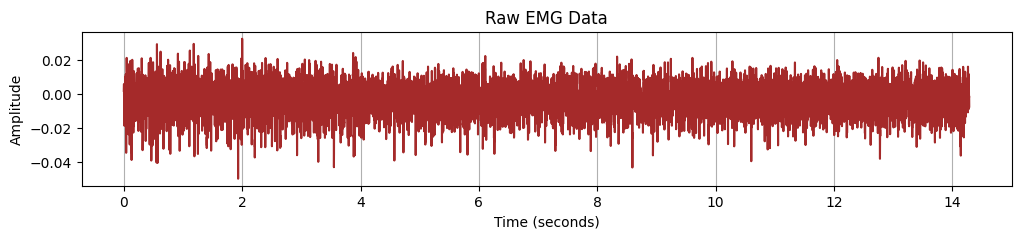

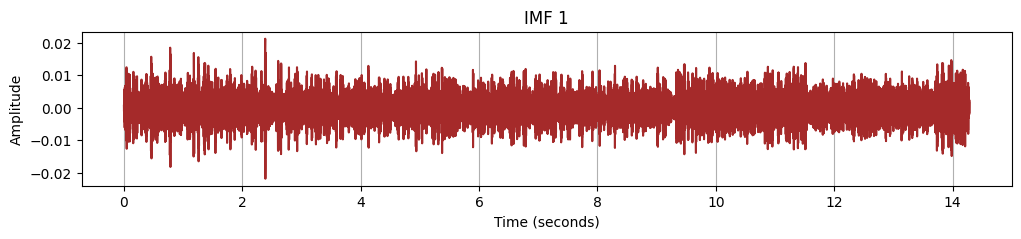

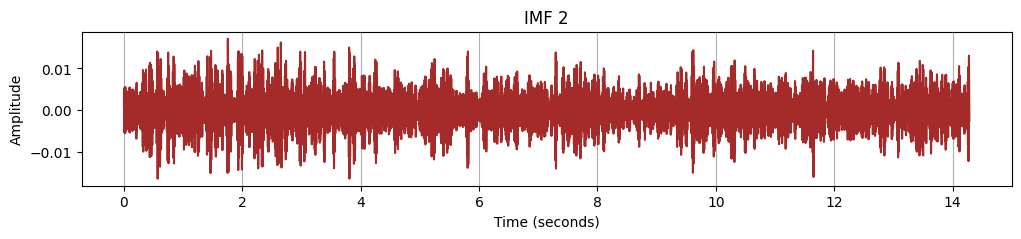

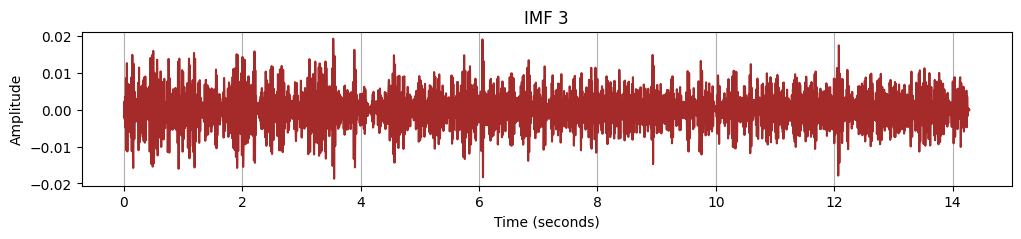

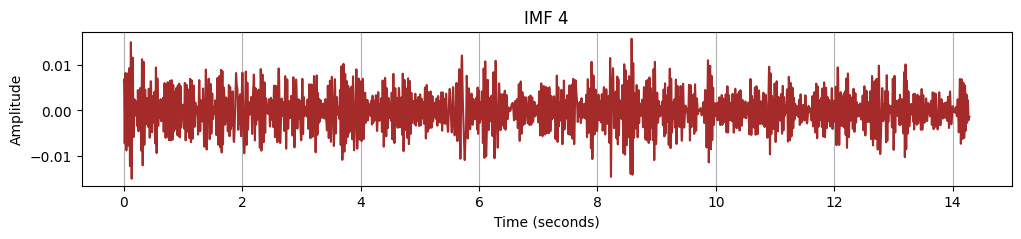

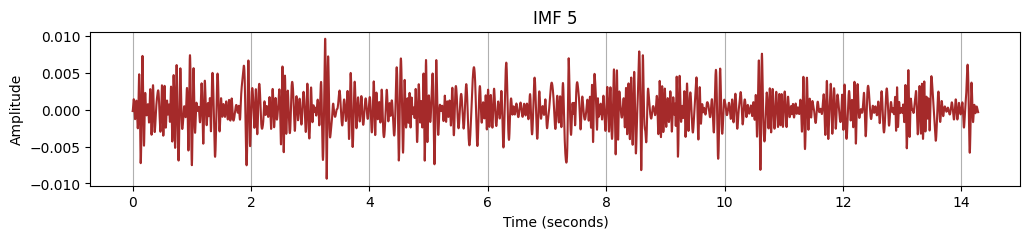

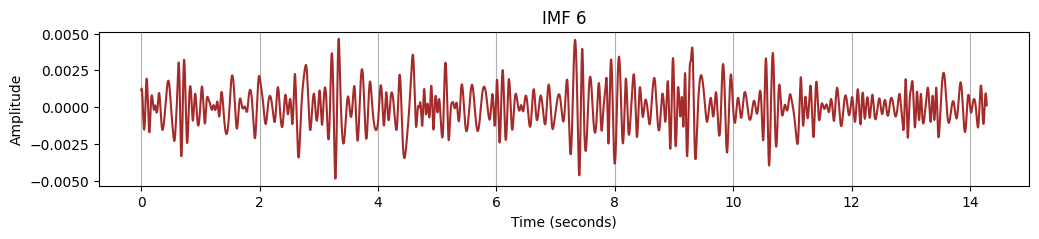

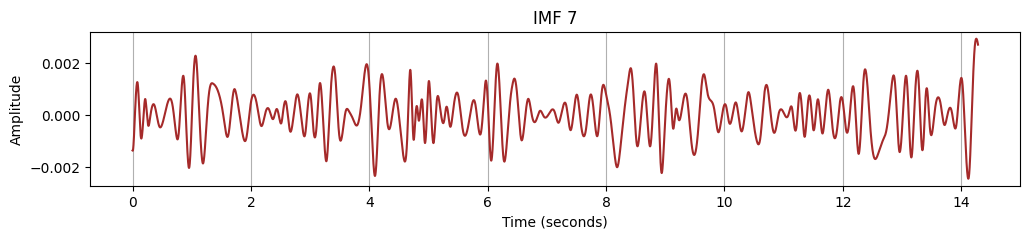

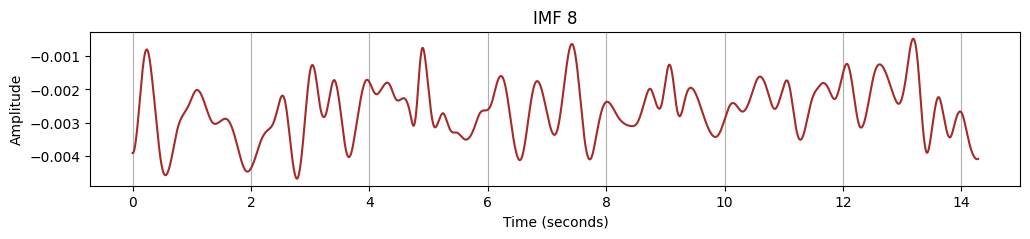

In [17]:
# Plot raw EMG signal
plt.figure(figsize=(12, 2))
plt.plot(time_emg, emg_data, color='brown')
plt.title('Raw EMG Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot IMFs
for i in range(n_imfs_emg):
    plt.figure(figsize=(12, 2))
    plt.plot(time_emg, imfs_emg[i], color='brown')
    plt.title('IMF ' + str(i+1))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()